# Graphs: Application of Laplacian Matrix



**Matrix Tree Theorem**:

<p align="center"> *Any cofactor of K is equal to the number of spanning trees of G.*






**Set up the Data** as per Kirby et al., 2016

In [0]:
import math
import scipy
from scipy.sparse import csr_matrix
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

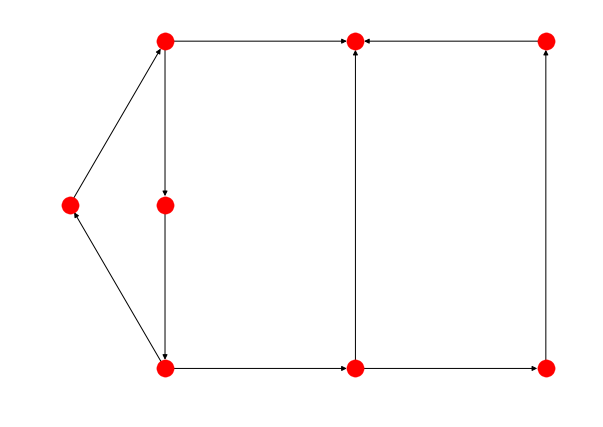

In [90]:
edgelist = ['1 2', '8 1', '2 3', '4 3', '8 3', '5 4', '4 7', '6 5', '7 6', '6 8']

G = nx.parse_edgelist(edgelist, create_using=nx.DiGraph(), nodetype=int)
fixed_positions = {1:(10,0), 2:(10,4), 3:(6,4), 4:(2,4), 5:(0,2), 6:(2,0), 7:(2,2), 8:(6,0)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)
nx.draw(G, pos)
plt.show()


**Get Adjacency Matrix A**

In [91]:
A = nx.to_scipy_sparse_matrix(G)
print(A.todense())

[[0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 1 0 0 1 0 0]]


**Get Incidence Matrix B**

In [92]:
B = nx.incidence_matrix(G, oriented=True, nodelist=[1,2,3,4,5,6,7,8]) # must provide nodelist to reproduce L as in shown in paper Figure 1.
print(B.todense()) # B is a SciPy sparse matrix
print('Incidence Matrix dimensions (rowsxcols): ', B.shape)

[[-1.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -1. -1.]
 [ 0.  0.  0.  0.  0.  1.  0. -1.  0.  0.]
 [ 0.  0. -1. -1.  0.  0.  0.  0.  0.  1.]]
Incidence Matrix dimensions (rowsxcols):  (8, 10)


**Get Laplacian from Adjacency Matrix A** (using Scipy in-built function)

In [93]:
L_fromA = scipy.sparse.csgraph.laplacian(csgraph=A, use_out_degree=True)           # scipy needs to get a NxN representation of G
L_fromA = L_fromA.todense()
print('\nLaplacian matrix from A\n', L_fromA)
print('\n this matrix is of no use for the purpose of computing the nbr of spanning trees in G.')


Laplacian matrix from A
 [[ 1 -1  0  0  0  0  0  0]
 [ 0  1  0 -1  0  0  0  0]
 [-1  0  2 -1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  2  0 -1  0]
 [ 0  0  0  0 -1  1  0  0]
 [ 0  0  0  0  0  0  1 -1]
 [ 0  0 -1  0  0 -1  0  2]]

 this matrix is of no use for the purpose of computing the nbr of spanning trees in G.


**Get Laplacian from Incidence Matrix B**

> **Important**: the order of the matrix multiplication depends on the shape of the incidence matrix:

> *  if nodes are rows and edges are columns: B * B.T
> *  if edges are rows and nodes are columns: B.T * B


>In this case we have a node > edges Incidence Matrix B.

In [94]:
L_fromB = B * B.T                # (8x10)x(10x8) -> L.shape: 8x8
L_fromB = L_fromB.todense()
print('Laplacian Matrix of the node -> edges incidence matrix of G:\n\n', L_fromB)
print('\n This is the same matrix as shown in Figure 1 in Kireby etal., 2016.')

Laplacian Matrix of the node -> edges incidence matrix of G:

 [[ 2. -1.  0.  0.  0.  0.  0. -1.]
 [-1.  2. -1.  0.  0.  0.  0.  0.]
 [ 0. -1.  3. -1.  0.  0.  0. -1.]
 [ 0.  0. -1.  3. -1.  0. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.]
 [ 0.  0.  0.  0. -1.  3. -1. -1.]
 [ 0.  0.  0. -1.  0. -1.  2.  0.]
 [-1.  0. -1.  0.  0. -1.  0.  3.]]

 This is the same matrix as shown in Figure 1 in Kireby etal., 2016.


**Get Number of Spanning Trees** using L obtained from Incidence Matrix B.

Note that using L obtained from A does not return the expected number of spaning trees.

In [95]:
Lsub = L_fromB[1:, 1:] # exclude the first row and the first column
cofactor = np.linalg.det(Lsub)
print('nbr spanning trees in G using L from B:', math.ceil(cofactor), '\n\nThis result matches Kirby et al., 2016!\n\n')

nbr spanning trees in G using L from B: 60 

This result matches Kirby et al., 2016!




**Definitions**:

*   Cofactor: The determinant obtained by deleting the row and column of a given element of a matrix or determinant.
*   Determinant: A single number obtained from a matrix that reveals a variety of the matrix's properties.


**Reference**:

Kirby, E.C., Mallion, R.B., Pollak, P. and Skrzyński, P.J. 2016. What Kirchhoff Actually did Concerning Spanning Trees in Electrical Networks and its Relationship to Modern Graph-Theoretical Work. Croatica Chemica Acta, 89(4), pp.403–417.